<a href="https://colab.research.google.com/github/vmatiasw/modelos_y_simulacion/blob/main/P5E7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

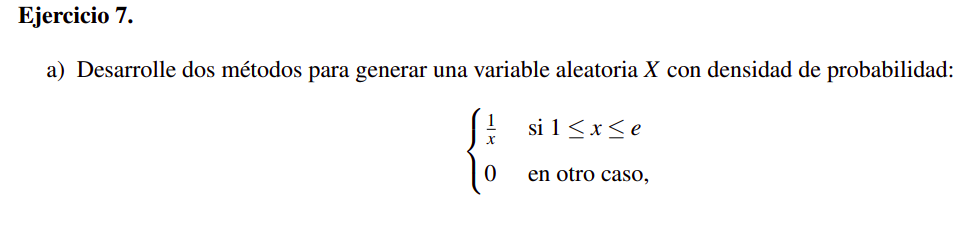

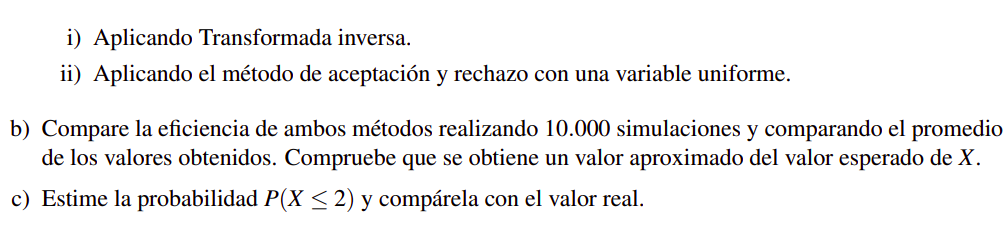

In [237]:
from random import random
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def f(x):
  return 1 / x

NUMERO_DE_MUESTRAS = 100_000

DOMINIO = np.linspace(1, np.e, 100) # 1 <= x <= e en todas las f

## 7.a.i)

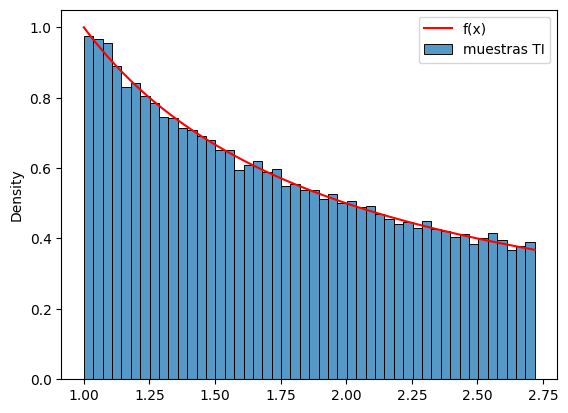

In [238]:
#@title { vertical-output: true}

# 7.a.i)

def muestreador_TI():
  u = random()
  return np.e**u

muestras = [muestreador_TI() for _ in range(NUMERO_DE_MUESTRAS)]

# Grafico
y = f(DOMINIO)
sns.lineplot(x=DOMINIO, y=y, color='red', label='f(x)')
sns.histplot(muestras, stat='density', label='muestras TI')
plt.legend()
plt.show()

## 7.a.ii)

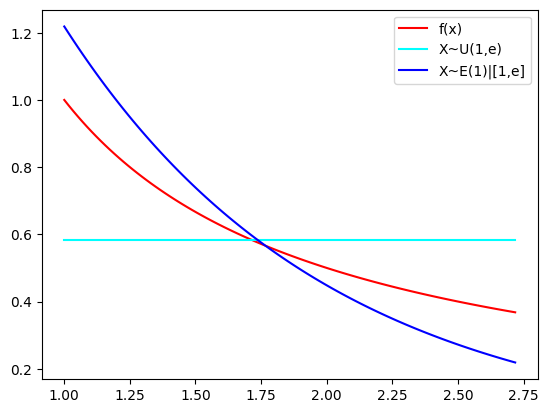

In [239]:
#@title { vertical-output: true}

# 7.a.ii)
# propongo la distribucion U(1,e) y para probar una mejor, la E(1) restringida

def f_U1e(x):
  return 1 / (np.e - 1) # 1 / (b - a)

def f_E1_restringido(x): #
  return np.e**(-x) / (np.e**(-1) - np.e**(-np.e))

sns.lineplot(x=DOMINIO, y=f(DOMINIO), color='red', label='f(x)')
sns.lineplot(x=DOMINIO, y=f_U1e(DOMINIO), color='aqua', label='X~U(1,e)')
sns.lineplot(x=DOMINIO, y=f_E1_restringido(DOMINIO), color='blue', label='X~E(1)|[1,e]')
plt.legend()
plt.show()

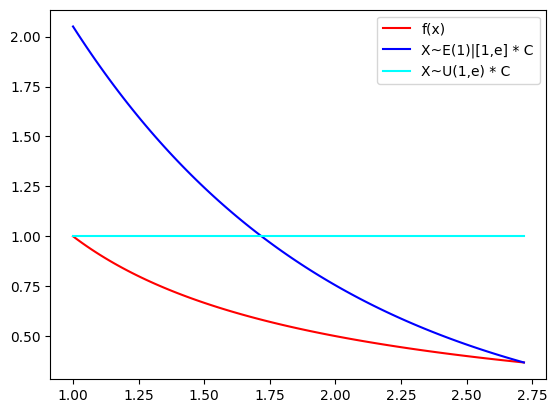

In [240]:
#@title { vertical-output: true}

# Busco sus C

# Para U(1,e) -> C = e-1
C_U1e = np.e - 1
fc_U1e = lambda x : f_U1e(x) * C_U1e

# Para E(1) => c = e^(e-1)
C_E1 = np.e**(np.e - 2) - np.e**(-1)
fc_E1 = lambda x : f_E1_restringido(x) * C_E1

sns.lineplot(x=DOMINIO, y=f(DOMINIO), color='red', label='f(x)')
sns.lineplot(x=DOMINIO, y=fc_E1(DOMINIO), color='blue', label='X~E(1)|[1,e] * C')
sns.lineplot(x=DOMINIO, y=fc_U1e(DOMINIO), color='aqua', label='X~U(1,e) * C')
plt.legend()
plt.show()

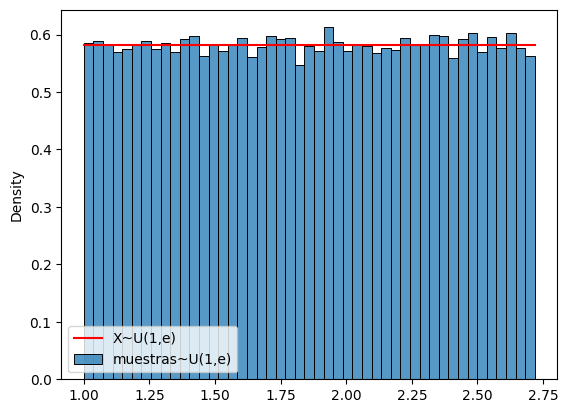

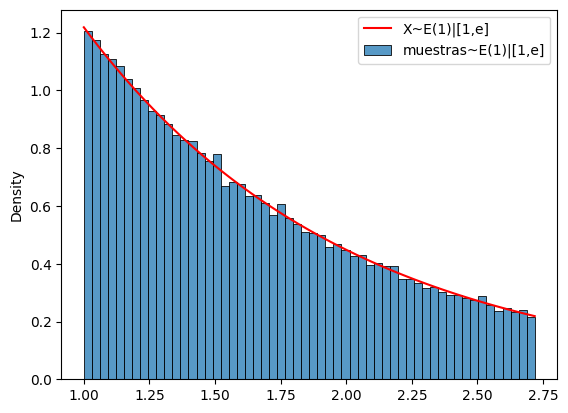

In [241]:
#@title { vertical-output: true}

# Hago sus generadores de muestras (i.e: muestreador)

def muestreador_U1e():
  u = random()
  return (np.e - 1) * u + 1

def muestreador_E1_restringido(): # restrinjido por AyR
  while True:
    u = random()
    muestra = -np.log(1-u) # ~E(1)
    if 1 <= muestra <= np.e:
      return muestra

muestras_U1e = [muestreador_U1e() for _ in range(NUMERO_DE_MUESTRAS)]
muestras_E1 = [muestreador_E1_restringido() for _ in range(NUMERO_DE_MUESTRAS)]

# Grafico U1e
y = f_U1e(DOMINIO)
sns.lineplot(x=DOMINIO, y=y, color='red', label='X~U(1,e)')
sns.histplot(muestras_U1e, stat='density', label='muestras~U(1,e)')
plt.legend()
plt.show()

# Grafico E1
y = f_E1_restringido(DOMINIO)
sns.lineplot(x=DOMINIO, y=y, color='red', label='X~E(1)|[1,e]')
sns.histplot(muestras_E1, stat='density', label='muestras~E(1)|[1,e]')
plt.legend()
plt.show()

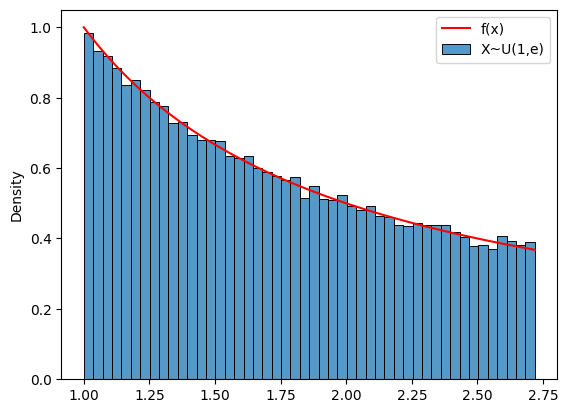

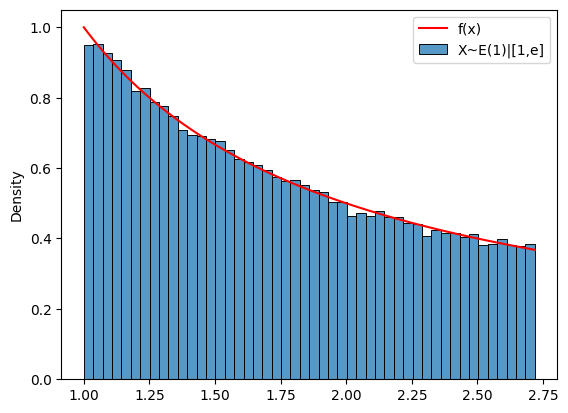

In [242]:
#@title { vertical-output: true}

def Factory_AyR(fdp_objetivo, muestreador_propuesto, fdp_propuesta, C):
  while True:
    muestra = muestreador_propuesto()
    u = random()

    if u < fdp_objetivo(muestra) / (fdp_propuesta(muestra) * C):
      return muestra

muestreador_AyR_U1e = lambda: Factory_AyR(f, muestreador_U1e, f_U1e, C_U1e)
muestreador_AyR_E1  = lambda: Factory_AyR(f, muestreador_E1_restringido, f_E1_restringido, C_E1)

muestras_AyR_U1e = [muestreador_AyR_U1e() for _ in range(NUMERO_DE_MUESTRAS)]
muestras_AyR_E1 = [muestreador_AyR_E1() for _ in range(NUMERO_DE_MUESTRAS)]

# Grafico
y = f(DOMINIO)
sns.lineplot(x=DOMINIO, y=y, color='red', label='f(x)')
sns.histplot(muestras_AyR_U1e, stat='density', label='X~U(1,e)')
plt.legend()
plt.show()

# Grafico
y = f(DOMINIO)
sns.lineplot(x=DOMINIO, y=y, color='red', label='f(x)')
sns.histplot(muestras_AyR_E1, stat='density', label='X~E(1)|[1,e]')
plt.legend()
plt.show()

In [243]:
def Factory_AyR_contador(fdp_objetivo, muestreador_propuesto, fdp_propuesta, C):
  numero_de_ciclos = 0
  while True:
    numero_de_ciclos += 1
    muestra = muestreador_propuesto()
    u = random()
    if u < fdp_objetivo(muestra) / (fdp_propuesta(muestra) * C):
      return numero_de_ciclos

ciclos_con_AyR_U1e = lambda: Factory_AyR_contador(f, muestreador_U1e, f_U1e, C_U1e)
ciclos_con_AyR_E1  = lambda: Factory_AyR_contador(f, muestreador_E1_restringido, f_E1_restringido, C_E1)

esperanza_ciclos_AyR_U1e = sum([ciclos_con_AyR_U1e() for _ in range(NUMERO_DE_MUESTRAS)]) / NUMERO_DE_MUESTRAS
esperanza_ciclos_AyR_E1 = sum([ciclos_con_AyR_E1() for _ in range(NUMERO_DE_MUESTRAS)]) / NUMERO_DE_MUESTRAS

print(f'Esperanza estimada de ciclos con AyR para U(1,e): {esperanza_ciclos_AyR_U1e}')
print(f'Esperanza estmada de ciclos con AyR para E(1)|[1,e]: {esperanza_ciclos_AyR_E1}')

Esperanza estimada de ciclos con AyR para U(1,e): 1.71841
Esperanza estmada de ciclos con AyR para E(1)|[1,e]: 1.68378


## 7.b comparacion

In [244]:
%%timeit
muestreador_TI()

201 ns ± 44 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [245]:
%%timeit
muestreador_AyR_U1e()

1.02 µs ± 3.78 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [246]:
%%timeit
muestreador_AyR_E1() # mas lento que el muestreador_AyR_U1e() por usar el muestreador_E1_restringido()

10.3 µs ± 3.82 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [247]:
esperanza_muestreador_TI = sum([muestreador_TI() for _ in range(NUMERO_DE_MUESTRAS)]) / NUMERO_DE_MUESTRAS
esperanza_muestreador_AyR_U1e = sum([muestreador_AyR_U1e() for _ in range(NUMERO_DE_MUESTRAS)]) / NUMERO_DE_MUESTRAS
esperanza_muestreador_AyR_E1 = sum([muestreador_AyR_E1() for _ in range(NUMERO_DE_MUESTRAS)]) / NUMERO_DE_MUESTRAS

print(f'Esperanza estimada de muestreador_TI: {esperanza_muestreador_TI}')
print(f'Esperanza estimada de muestreador_AyR_U1e: {esperanza_muestreador_AyR_U1e}')
print(f'Esperanza estimada de muestreador_AyR_E1: {esperanza_muestreador_AyR_E1}')
print(f'Esperanza real: {np.e - 1}')

Esperanza estimada de muestreador_TI: 1.7178338574333094
Esperanza estimada de muestreador_AyR_U1e: 1.7156205410615393
Esperanza estimada de muestreador_AyR_E1: 1.7181153546368348
Esperanza real: 1.718281828459045


## 7.c P(X<=2)

In [248]:
def probabilidad_estimada_de(condicion, muestreador, n=NUMERO_DE_MUESTRAS):
  return sum([condicion(muestreador()) for _ in range(n)]) / n

print('estimacion P(X<=2)=',probabilidad_estimada_de(lambda x: x <= 2, muestreador_TI))
print('estimacion P(X<=2)=',probabilidad_estimada_de(lambda x: x <= 2, muestreador_AyR_U1e))
print('estimacion P(X<=2)=',probabilidad_estimada_de(lambda x: x <= 2, muestreador_AyR_E1))
print('P(X<=2)=',np.log(2)-np.log(1))

estimacion P(X<=2)= 0.69385
estimacion P(X<=2)= 0.69177
estimacion P(X<=2)= 0.69303
P(X<=2)= 0.6931471805599453
